In [1]:
import json
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score

In [4]:
file_path = Path('../../data/tests/test1') / "nn_classifier_nada_trial_0_loss.json"

with open(file_path, "r") as f:
    data = json.load(f)

In [5]:
keys = data.keys()
print(keys)

dict_keys(['loss_train', 'loss_val', 'loss_test', 'conf_matrix_train_list', 'conf_matrix_val_list', 'conf_matrix_test'])


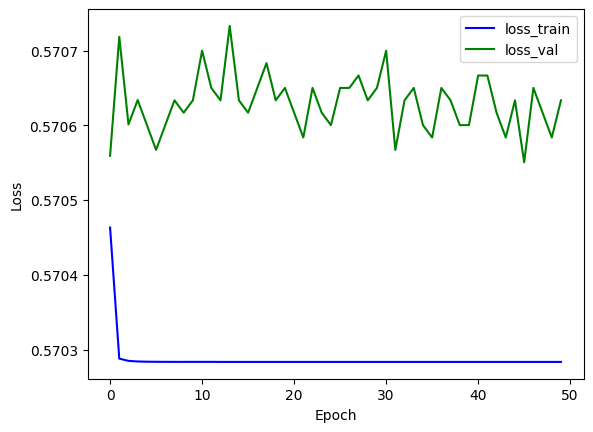

In [17]:
plt.plot(data['loss_train'][:50], label='loss_train', color='blue')
plt.plot(data['loss_val'][:50], label='loss_val', color='green')
# plt.plot(data['loss_test'], label='loss_test', color='red')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [18]:
keys

dict_keys(['loss_train', 'loss_val', 'loss_test', 'conf_matrix_train_list', 'conf_matrix_val_list', 'conf_matrix_test'])

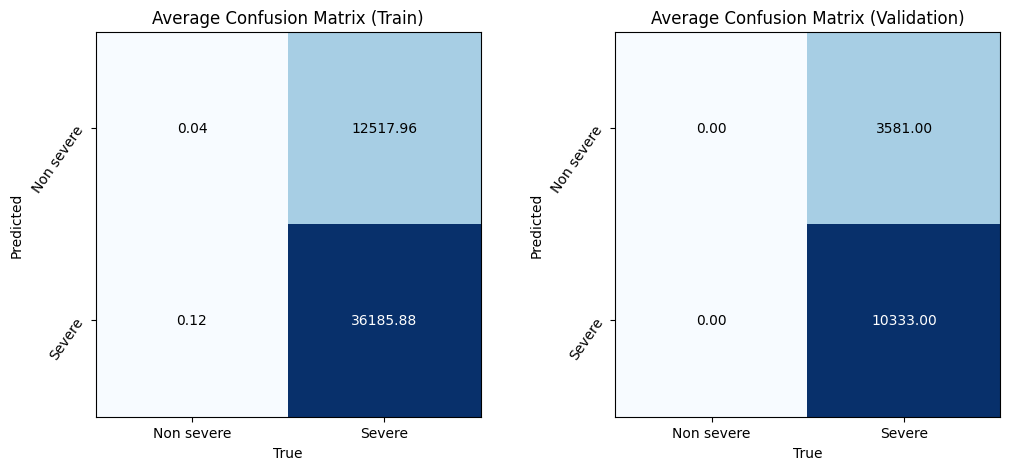

In [46]:
# Calculate average confusion matrix
avg_conf_matrix_train = np.mean([np.array(list(conf_matrix.values())[0]) for conf_matrix in data['conf_matrix_train_list']], axis=0)
# com exceção da primeira epoca, a primeira coluna é tudo zero (treinamento)
avg_conf_matrix_val = np.mean([np.array(list(conf_matrix.values())[0]) for conf_matrix in data['conf_matrix_val_list']], axis=0)

plt.figure(figsize=(19, 5))

plt.subplot(1, 3, 1)
plt.imshow(avg_conf_matrix_train, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Average Confusion Matrix (Train)')
# plt.colorbar()
plt.xlabel("True")
plt.ylabel("Predicted")
plt.xticks([0, 1], ['Non severe', 'Severe'])
plt.yticks([0, 1], ['Non severe', 'Severe'], rotation=55)
for i in range(avg_conf_matrix_train.shape[0]):
    for j in range(avg_conf_matrix_train.shape[1]):
        color = 'white' if avg_conf_matrix_train[i, j] > np.max(avg_conf_matrix_train) / 2 else 'black'
        plt.text(j, i, f'{avg_conf_matrix_train[i, j]:.2f}', ha='center', va='center', color=color)


plt.subplot(1, 3, 2)
plt.imshow(avg_conf_matrix_val, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Average Confusion Matrix (Validation)')
# plt.colorbar()
plt.xlabel("True")
plt.ylabel("Predicted")
plt.xticks([0, 1], ['Non severe', 'Severe'])
plt.yticks([0, 1], ['Non severe', 'Severe'], rotation=55)
for i in range(avg_conf_matrix_val.shape[0]):
    for j in range(avg_conf_matrix_val.shape[1]):
        color = 'white' if avg_conf_matrix_val[i, j] > np.max(avg_conf_matrix_val) / 2 else 'black'
        plt.text(j, i, f'{avg_conf_matrix_val[i, j]:.2f}', ha='center', va='center', color=color)


In [47]:
# need to do the curve with the accuracy, recall and f1

In [ ]:
# Calculate accuracy, recall, and F1 score for each epoch
epochs = range(1, len(data['conf_matrix_train_list']) + 1)
accuracy_list = []
recall_list = []
f1_list = []

for i, (conf_matrix_train, conf_matrix_val) in enumerate(zip(data['conf_matrix_train_list'], data['conf_matrix_val_list'])):
    y_true_train, y_pred_train = np.array(list(conf_matrix_train.values())[0]).ravel()
    y_true_val, y_pred_val = np.array(list(conf_matrix_val.values())[0]).ravel()

    accuracy_train = accuracy_score(y_true_train, y_pred_train)
    accuracy_val = accuracy_score(y_true_val, y_pred_val)

    recall_train = recall_score(y_true_train, y_pred_train)
    recall_val = recall_score(y_true_val, y_pred_val)

    f1_train = f1_score(y_true_train, y_pred_train)
    f1_val = f1_score(y_true_val, y_pred_val)

    accuracy_list.append((i + 1, accuracy_train, accuracy_val))
    recall_list.append((i + 1, recall_train, recall_val))
    f1_list.append((i + 1, f1_train, f1_val))

In [ ]:
# Plot accuracy, recall, and F1 score
plt.subplot(1, 3, 3)
plt.plot(epochs, [item[1] for item in accuracy_list], label='Train', marker='o')
plt.plot(epochs, [item[2] for item in accuracy_list], label='Validation', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.tight_layout(w_pad=3)  # Adjust the width space between the plots
plt.show()